In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
"""
Write a function that takes pandas dataframe df as input. This dataset is assumed to have 2 columns, 
'x' and 'y'. We are going to create a regression model from scikit-learn to try to predict the 'y' 
column based off the values in the 'x' column. This function will need to take the following steps,

* Remove all rows with missing values.
* Split the data into a training set and testing set with the sklearn train_test_split() method
(see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
Use a test_size of 0.25, and a random_state of 42. 
* Initialize a scikit-learn linear regression model and fit the model to the training set data.
(see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Do 
not specify any hyperparameters.
* Once the model is fit, make a plot of the models predictions for the 'y' values in the dataset compared to 
the actual values
* Return the r^2 score when predicted on the testing set data with the score() method.
"""



"\nWrite a function that takes pandas dataframe df as input. This dataset is assumed to have 2 columns, \n'x' and 'y'. We are going to create a regression model from scikit-learn to try to predict the 'y' \ncolumn based off the values in the 'x' column. This function will need to take the following steps,\n\n* Remove all rows with missing values.\n* Split the data into a training set and testing set with the sklearn train_test_split() method\n(see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). \nUse a test_size of 0.25, and a random_state of 42. \n* Initialize a scikit-learn linear regression model and fit the model to the training set data.\n(see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Do \nnot specify any hyperparameters.\n* Once the model is fit, make a plot of the models predictions for the 'y' values in the dataset compared to \nthe actual values\n* Return the r^2 score when p

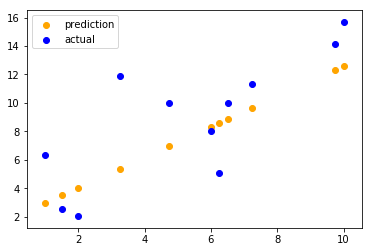

r^2 score is 0.514822555392237


In [57]:
######ANSWER#######

def f(df):
    #df is a pandas dataframe with the columns 'x' and 'y'
    
    #remove all rows with missing values (known as NaNs)
    df = df.dropna()
    
    #isolate target variable y from all other variables X. In this case, X will only have one column. 
    y = df['y']
    X = df.drop('y', axis=1) # X = df['x'] would also work in this case
    
    #Create training and testing set with X and y
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    #The data is being broken up into a training and testing set so that the model can be trained 
    #on the training set and then evaluated on the testing set. After all, evaluating the quality of 
    #a model on the same dataset that the model was trained on would be meaningless. test_size is the 
    #fraction of the original dataset that goes into the testing set. random_state is a parameter 
    #that affects how the data is randomly split but it is not super important
    
    #initialize the model
    model = LinearRegression() #notice the same name as what we imported 
    
    #fit the model on the training set
    model.fit(X_train, y_train)
    #this is the stage where the model tries to learn the relationship between x and y to be able to predict
    #y from x on new datapoints
    
    #plot the predictions on the test set vs the actual values
    prediction = model.predict(X_test)
    plt.scatter(X_test['x'], prediction, color='orange', label='prediction')
    #this will create a line showing the prediction
    plt.scatter(X_test['x'], y_test, color='blue', label='actual')
    #these are the actual (x,y) points in the test set
    plt.legend()
    plt.show()
    
    #return the r^2 score
    return model.score(X_test, y_test)
    #r^2 is the score used here to evaluate the quality of the model. An r^2 score of 1 means the predictions
    #were perfect. An r^2 score of 0 means it predicted the average value of y_test for every datapoint in the 
    #test set (Not good!)
    
######TEST CASE#######
a_x = np.linspace(0,10,41)
a_y = np.array([a_x[i] + 3*np.random.normal() + 3 for i in range(len(a_x))])
df = pd.DataFrame()
df['x'] = a_x
df['y'] = a_y

r2 = f(df)
#plot is created while executing f(df)
print('r^2 score is ' + str(r2))